# Deliverables

1. Code
2. .png files of each graph
3. .png file of the collated graphs
4. A sample of of the collated file pasted on a document then saved as a .pdf file.
5. Push everything to your github account.

# Barplot

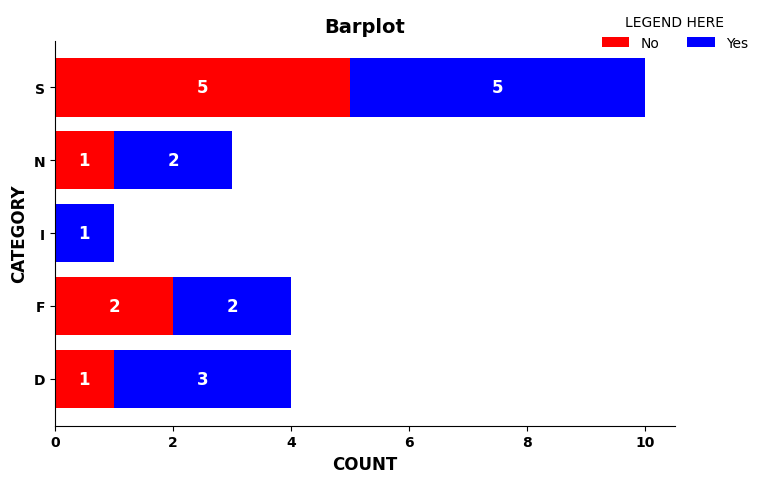

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file_path = "bar_assignment.csv"
df = pd.read_csv(file_path)

counts = df.groupby(['LABEL', 'COUNT']).size().unstack(fill_value=0)

counts.columns = ['No', 'Yes']

counts = counts.sort_index()

fig, ax = plt.subplots(figsize=(8, 5))
y_labels = counts.index
yes_values = counts['Yes']
no_values = counts['No']

y_pos = np.arange(len(y_labels))

ax.barh(y_pos, no_values, color='red', label="No")
ax.barh(y_pos, yes_values, left=no_values, color='blue', label="Yes")

for i, (no, yes) in enumerate(zip(no_values, yes_values)):
    if no > 0:
        ax.text(no / 2, i, str(no), va='center', ha='center', color='white', fontsize=12, fontweight='bold')
    if yes > 0:
        ax.text(no + yes / 2, i, str(yes), va='center', ha='center', color='white', fontsize=12, fontweight='bold')

ax.set_yticks(y_pos)
ax.set_yticklabels(y_labels)
ax.set_xticks(range(0, 11, 2))
ax.set_xlabel("COUNT", fontsize=12, fontweight='bold')
ax.set_ylabel("CATEGORY", fontsize=12, fontweight='bold')
ax.set_title("Barplot", fontsize=14, fontweight='bold')

legend = ax.legend(title="LEGEND HERE", loc="upper center", bbox_to_anchor=(1.0, 1.1), ncol=2, frameon=False)

ax.spines[['top', 'right']].set_visible(False)
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')


plt.savefig("barplot.png", dpi=300, bbox_inches='tight')
plt.show()


# Sankey Plot

In [1]:
import pandas as pd
import plotly.graph_objects as go

df = pd.read_csv("sankey_assignment.csv")

sources = ['PS', 'OMP', 'CNP', 'NRP', 'NMCCC', 'PEC', 'NCDM', 'RGS']
middles = ['S', 'F', 'D', 'N', 'I']
targets = ['Reg', 'Aca', 'Oth']

nodes = {name: i for i, name in enumerate(sources + middles + targets)}

links = []

for src in sources:
    for mid in middles:
        value = df[df["LABEL"] == mid][src].values[0]
        if value > 0:
            links.append((src, mid, value))

for mid in middles:
    for tgt in targets:
        value = df[df["LABEL"] == mid][tgt].values[0]
        if value > 0:
            links.append((mid, tgt, value))

source_indices = [nodes[src] for src, tgt, val in links]
target_indices = [nodes[tgt] for src, tgt, val in links]
values = [val for src, tgt, val in links]

custom_colors = {
    'OMP': 'rgb(0, 128, 128)',  # Teal
    'PS': 'rgb(255, 165, 0)',   # Orange
    'CNP': 'rgb(255, 69, 0)',   # Red-Orange
    'NRP': 'rgb(255, 20, 147)', # Deep Pink
    'NMCCC': 'rgb(255, 255, 0)',# Yellow
    'PEC': 'rgb(144, 238, 144)',# Light Green
    'NCDM': 'rgb(0, 255, 255)', # Cyan
    'RGS': 'rgb(0, 128, 0)',    # Green
    'S': 'rgb(173, 216, 230)',  # Light Blue
    'F': 'rgb(0, 0, 128)',      # Navy
    'D': 'rgb(0, 100, 0)',      # Dark Green
    'N': 'rgb(0, 0, 255)',      # Blue
    'I': 'rgb(135, 206, 250)',  # Sky Blue
    'Reg': 'rgb(0, 255, 127)',  # Spring Green
    'Aca': 'rgb(0, 191, 255)',  # Deep Sky Blue
    'Oth': 'rgb(34, 139, 34)'   # Forest Green
}


fig = go.Figure(go.Sankey(
    node=dict(
        pad=20,
        thickness=25,
        line=dict(color="black", width=1),
        label=list(nodes.keys()),
        color=[custom_colors[name] for name in nodes.keys()]
    ),
    link=dict(
        source=source_indices,
        target=target_indices,
        value=values,
        color=[custom_colors[tgt] for src, tgt, val in links] 
    )
))

fig.update_layout(
    title_text="Sankey Diagram",
    font=dict(family="Verdana", size=12, color="black"),
    title_font=dict(size=18, family="Verdana", color="black"),
    height=650,
    paper_bgcolor="white",
)

fig.show()


# Network Plot